In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

In [3]:
dataset = pd.read_csv('weatherAUS.csv')
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
dataset.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


In [5]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

for col in numerical:
    col_median=dataset[col].median()
    dataset[col].fillna(col_median, inplace=True) 

Одномерная регрессия: MaxTemp по Temp3pm

In [7]:
X = dataset.Temp3pm.values.reshape(-1, 1)
y = dataset.MaxTemp.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

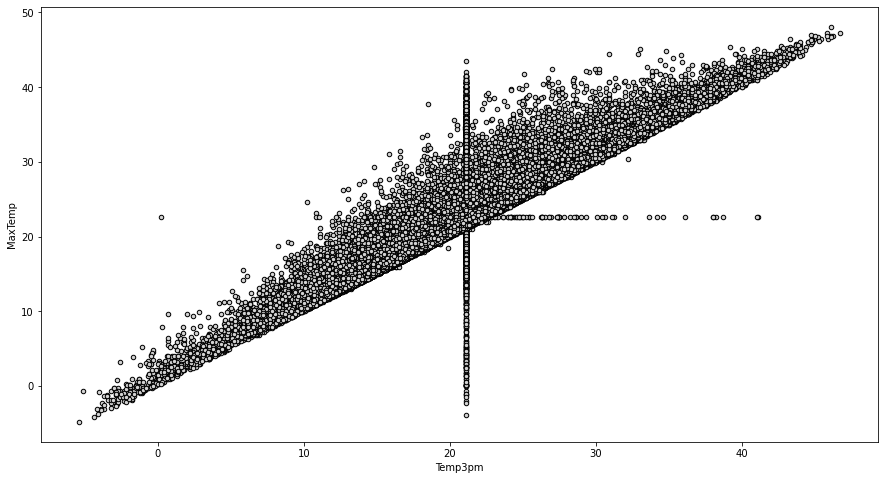

In [8]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="lightgray", label="data")
plt.xlabel("Temp3pm")
plt.ylabel("MaxTemp")

fig = plt.gcf()
fig.set_size_inches(15, 8, forward=True)

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print('R2 score: {:.4f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.9412


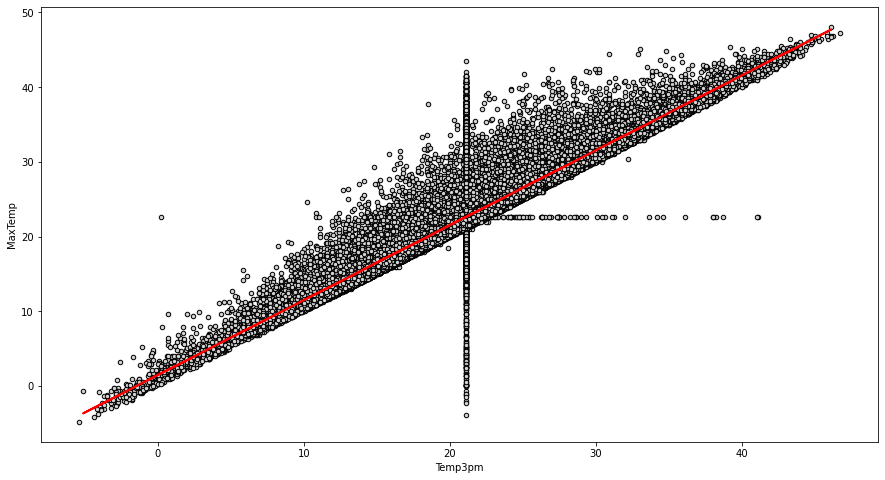

In [10]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="lightgray", label="data")
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.xlabel("Temp3pm")
plt.ylabel("MaxTemp")

fig = plt.gcf()
fig.set_size_inches(15, 8, forward=True)

In [11]:
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X_train, y_train)

y_1 = regr.predict(X_test)
print('R2 score: {:.4f}'.format(r2_score(y_test, y_1)))

R2 score: 0.9403


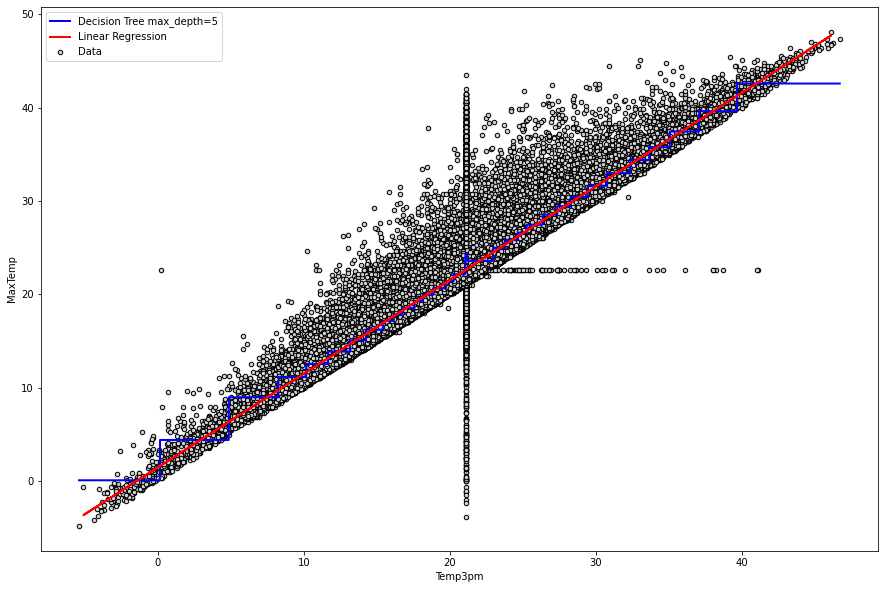

In [12]:
# Plot the results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="lightgray", label="Data")
plt.plot(X_grid, regr.predict(X_grid), color="blue",
         label="Decision Tree max_depth=5", linewidth=2)
plt.plot(X_test, y_pred, color='red', 
         label="Linear Regression", linewidth=2);
plt.xlabel("Temp3pm")
plt.ylabel("MaxTemp")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [14]:
y = dataset.MaxTemp
X = dataset[['Temp9am','Temp3pm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
models = [
          LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          #SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          DecisionTreeRegressor(max_depth=5) #дерево решений с максимальной глабиной 5
         ]

In [16]:
#создаем временные структуры
TestModels = pd.DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    model.fit(X_train, y_train) 
    tmp['R2'] = r2_score(y_test, model.predict(X_test))

    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

In [17]:
TestModels

,R2
Model,
LinearRegression,0.953766
RandomForestRegressor,0.968491
KNeighborsRegressor,0.969183
DecisionTreeRegressor,0.956739


In [18]:
X = dataset[['Temp9am','Temp3pm', 'Evaporation', 'Sunshine']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
#создаем временные структуры
TestModels = pd.DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    model.fit(X_train, y_train) 
    tmp['R2'] = r2_score(y_test, model.predict(X_test))

    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

In [20]:
TestModels

,R2
Model,
LinearRegression,0.954115
RandomForestRegressor,0.971233
KNeighborsRegressor,0.969974
DecisionTreeRegressor,0.956739


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5,10],#,80, 90, 100, 110],
    'max_features': [2],
    'min_samples_leaf': [5],
    'min_samples_split': [12],
    'n_estimators': [10,20,50]#100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [23]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   14.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [24]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 50}

In [25]:
best_model = RandomForestRegressor(bootstrap=True, 
                                   max_depth=10,
                                   max_features=2,
                                   min_samples_leaf=5,
                                   min_samples_split=12,
                                   n_estimators=50)
best_model.fit(X_train, y_train)
r2_score(y_test, best_model.predict(X_test))

0.9735725262258623

In [35]:
model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.9711272867103373